# Week 6 Self Check Questions

Let $A\in\mathbb{R}^{m\times n}$ with $m\geq n$ and $\text{rank}(A)=n$ and $b\in\mathbb{R}^m$. We define the following least-squares problem: 

Find $\hat{x}\in\mathbb{R}^n$, such that

$$
\|A\hat{x}-b\|_2 = \min_{x\in\mathbb{R}^n}\|Ax-b\|_2.
$$



Question 1:

Give the definition of the singular value decomposition for $A$. Using the SVD and the definition of the pseudo-inverse $A^{\dagger}$
show that $\hat{x}=A^{\dagger}b$.

Solution:
    
The SVD of $A$ is given as $A=U\Sigma V^T$, where $U\in\mathbb{R}^{m\times m}$ and $V\in\mathbb{R}^{n\times n}$ are orthogonal
matrices and $\Sigma \in\mathbb{R}^{m\times n}$ is a diagonal matrix with the nonzero singular values $\sigma_1\geq\sigma_2\geq\dots\geq\sigma_r$ in decreasing order on the diagonal of the matrix.

Let $A = U\Sigma V^T$. Substituting into the least-squares problem we have
$$
\|Ax-b\|_2 = \|U\Sigma V^Tx - b\|_2 = \|\Sigma y - \hat{b}\|_2
$$
        
for $y=V^Tx$ and $\hat{b} = U^Tb$. By minimizing the above expression we find $y_j$ as $y_j = \hat{b}_j/\sigma_j$. If $\sigma_j=0$ then we set $y_j=0$. This is equivalent to $y = \Sigma^{\dagger}\hat{b}$.
Substituting back in for $\hat{b}$ and $y$ we obtain $x = V\Sigma^{\dagger}U^Tb = A^{\dagger}b$. 


Question 2:
    
We now consider the modified least-squares problem
$$\min_{x\in\mathbb{R}^n} \|Ax-b\|_2^2+\|L x\|_2^2$$
with $L\in\mathbb{R}^{n\times n}$ nonsingular.
Show that the solution of this least-squares problem is identical to the solution of
$$
(A^TA+L^TL)x = A^Tb.
$$

Solution:
    
The modified least-squares problem is identical to
$$
\min_{x\in\mathbb{R}^n}\left\|\begin{bmatrix}A\\L\end{bmatrix}x-\begin{bmatrix}b\\ 0\end{bmatrix}\right\|_2.
$$
Applying the normal equation to this problem we arrive at
$$
(A^TA+L^TL)x = A^Tb.
$$    


Question 3:
    
Denote the trace of matrix $A\in\mathbb{R}^{m\times n}$ as $\text{trace}(A) :=\sum_{j=1}^n a_{jj}$. Note that $\|A\|_{F}:=\left[\text{trace}(A^TA)\right]^{1/2}$.

Show that $\text{trace}(AB) = \text{trace}(BA)$ for arbitrary matrices $A$ and $B$. Conclude that $\|PAQ\|_{F} = \|A\|_{F}$ for orthogonal matrices $P\in\mathbb{R}^{m\times m}$ and $Q\in\mathbb{R}^{n\times n}$.

Finally, show that a solution of the minimization problem $\min_{X\in\mathbb{R}^{n\times m}}\|AX-I\|_{F}$ is $X=A^{\dagger}$, where $I$ is the $m\times m$ identity matrix.

Solution:
    
We have $\text{trace}(AB) = \sum_i \sum_k a_{ik}b_{ki} = \sum_{k}\sum_{i}b_{ki}a_{ik} = \text{trace}(BA)$.

We can conclude that        
$$
\|PAQ\|_F^2 = \text{trace}(Q^TA^TP^TPAQ) = \text{trace}(QQ^TA^TA) = \text{trace}(A^TA) = \|A\|_F^2
$$

Let $A=U\Sigma V^T$ be the SVD of $A$. We have
            $$
            \|AX - I\|_F = \|U\left[\Sigma V^TX -U^T\right]\|_F = \|\Sigma \tilde{X}-U^T\|_F
            $$
            for $\tilde{X} = V^TX$. It follows that for $\tilde{X} = \Sigma^\dagger U^T$ we can cancel out the first $n$ rows in the difference $\Sigma \tilde{X}-U^T$. Since the second $m-n$ rows of $\Sigma$ are zero we have no control over the lower part of this difference, and therefore $\tilde{X}$ is indeed a minimizer. It follows that $X=V\Sigma^\dagger U^T = A^{\dagger}$. 

Question 4:
    
The singular value decomposition is a great tool for the low-rank approximation of data sets. A great way to visualize the low-rank approximation property of the SVD is image compression. While there are far more efficient ways to compress images, it is a nice way to visualize what the SVD does.

A gray-scale image is nothing but a matrix where each element has a value that describes the gray-scale from white to black. Below is a short code that loads a Scipy example image and displays it.

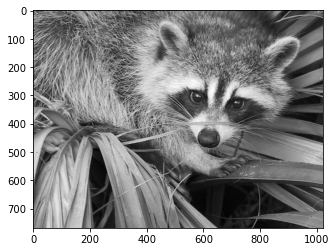

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.misc
image = scipy.misc.face(gray=True)
plt.imshow(image,cmap=plt.gray())

Write code that computes from this image low-rank approximations of rank r and display the resulting image in the same way as shown above. For this you will need to Scipy svd function, which is available from scipy.linalg.

Solution:

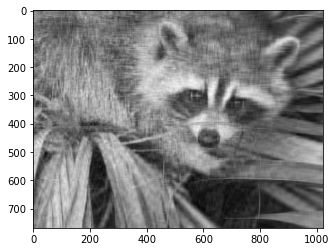

In [3]:
%matplotlib inline
n = 30 # Change n to get different low-rank compressions. The original has n=512
import scipy
import numpy as np
from scipy.linalg import svd
import scipy.misc
image = scipy.misc.face(gray=True)
U,S,Vh = svd(image)
image_compressed = np.dot(np.dot(U[:,:n],np.diag(S[:n])),Vh[:n,:])
from matplotlib import pyplot as plt
plt.imshow(image_compressed,cmap=plt.gray())

Note that while the SVD is used for a wide range of data approximation problems, it is not well suited for image compression. Wavelet-based methods such as those implemented in the JPEG File format are much better for images.